#**Тестовое задание**
---
* Необходимо разработать алгоритм, позволяющий определить:
* совпадение траектории 3 и траектории 1;
* незначительное отличие траектории 2 от траектории 1;
* существенное отличие траектории 4 от траекторий 1, 2 и 3.



##**Подготовка данных**

Всего имеем 4 траектории (tracks)

In [1]:
# Загрузка зависимостей

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from numpy import NaN


In [2]:
df = pd.read_csv("traks.csv", sep = ";")

In [3]:
df

,track,time,x,y
0,1,10:32:13,1598,526
1,1,10:32:14,1524,544
2,1,10:32:15,1441,557
3,1,10:32:16,1357,392
4,1,10:32:17,1395,573
...,...,...,...,...
109,4,10:42:09,432,689
110,4,10:42:10,450,736
111,4,10:42:11,503,754
112,4,10:42:12,1620,924


In [4]:
# В качестве индекса будем использовать время фиксирования точек

df.set_index('time', inplace=True)

In [5]:
# Отделяем треки

track_1 = df[df['track'] == 1]
track_2 = df[df['track'] == 2]
track_3 = df[df['track'] == 3]
track_4 = df[df['track'] == 4]

In [6]:
track_1


,track,x,y
time,,,
10:32:13,1,1598,526
10:32:14,1,1524,544
10:32:15,1,1441,557
10:32:16,1,1357,392
10:32:17,1,1395,573
10:32:18,1,1352,409
10:32:19,1,1415,573
10:32:20,1,1358,379
10:32:21,1,1424,557


In [7]:
track_2

,track,x,y
time,,,
10:35:17,2,1588,498
10:35:18,2,1438,530
10:35:19,2,1286,556
10:35:20,2,1274,325
10:35:21,2,1280,556
10:35:22,2,1264,334
10:35:23,2,1274,556
10:35:24,2,1109,595
10:35:25,2,919,637


In [8]:
track_3

,track,x,y
time,,,
10:39:03,3,1584,495
10:39:04,3,1394,531
10:39:05,3,1365,380
10:39:06,3,1404,539
10:39:07,3,1356,386
10:39:08,3,1390,542
10:39:09,3,1346,373
10:39:10,3,1378,538
10:39:11,3,1288,556


In [9]:
track_4

,track,x,y
time,,,
10:41:55,4,1609,515
10:41:56,4,1425,554
10:41:57,4,1302,579
10:41:58,4,1535,541
10:41:59,4,1662,474
10:42:00,4,1266,579
10:42:01,4,1103,579
10:42:02,4,819,633
10:42:03,4,855,362


In [10]:
# Сколько секунд (точек) на каждую траекторию?

print(track_1.shape)
print(track_2.shape)
print(track_3.shape)
print(track_4.shape)

(35, 3)
(27, 3)
(33, 3)
(19, 3)


**Можем сделать вывод:**

Главной проблемой для сравнения траекторий будет **разное количество точек в траекториях** 

(т.к. данные обновлялись раз в секунду, а некоторые траектории оказывались быстрее/медленнее)

**Решение:**

Сравнивать две траектории путем интерполирования минимальной (по количеству точек) к максимальной

##**Визуализация путей**

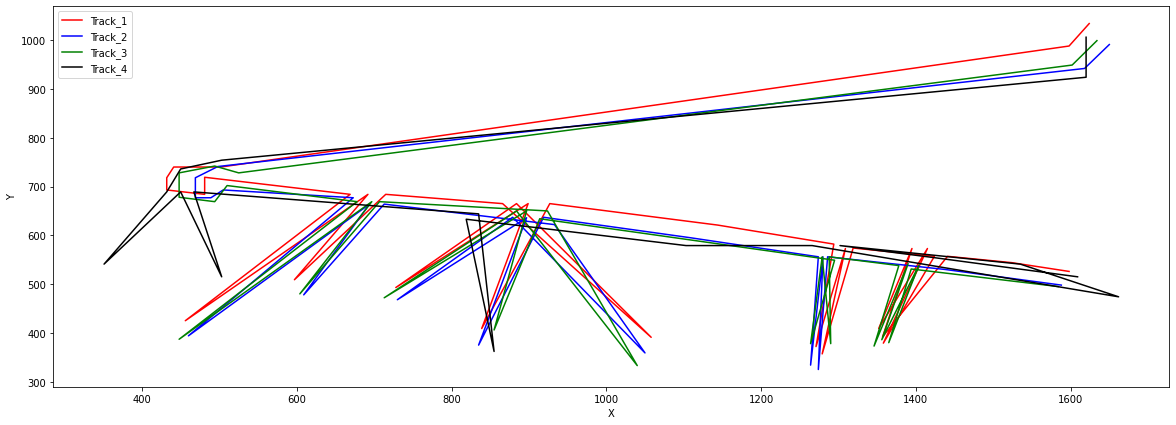

In [11]:
# Визуализируем траектории

plt.figure(figsize=(20,7))
plt.plot(track_1["x"], track_1["y"], label = 'Track_1', color = 'red')
plt.plot(track_2["x"], track_2["y"], label = 'Track_2', color = 'blue')
plt.plot(track_3["x"], track_3["y"], label = 'Track_3', color = 'green')
plt.plot(track_4["x"], track_4["y"], label = 'Track_4', color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

##**Алгоритм для сравнения путей**

In [12]:
# Функция для интерполяции траектории 

def df_interpolate(dataframe):
  prev_index = 0 # Переменная для сохранения предыдущего значения индекса
  counter = 0 # Переменная для числового доступа (enumerate неприменим к .iterrows)

  # Иттерация по каждой строке 
  for index, row in dataframe.iterrows():
      counter =+1
      if index == prev_index:              # В случае совпадения текущего значения индекса с предыдущим
        dataframe.iloc[[counter]] = NaN    # Значение строки = NaN
      prev_index = index

  return dataframe.interpolate(method = "linear") # Линейная интерполяция пустых значений

In [13]:
# Функция для создания новых индексов 

def get_new_index(start, end, size):
    dates = []
    index = pd.date_range(start = start, end = end, periods = size) # Указываем нужный период и количество промежутков
  
    # Конвертация datetime к формату h:m:s
    for i in index:
       dates.append(f"{i.hour}:{i.minute}:{i.second if i.second >= 10 else '0' + str(i.second)}") 
       
    return dates

In [14]:
# Функция для сравнения двух траекторий

def compare_tracks(first_track, second_track):
 
    # Сравниваем размер треков - нужно выделить больший и меньший
    # Если первая траектория больше (по количеству точек):
    if first_track.shape[0] > second_track.shape[0]:
      size = first_track.shape[0]   # Возьмем размер наибольшей траектории
      start = second_track.index[0]  # Начальный период измерений наименьшей точки
      end = second_track.index[-1]    # Конечный период измерений наименьшей точки
      second_track = second_track.reindex(get_new_index(start, end, size)) # Обновим меньшую траекторию (новые индексы)
      second_track = df_interpolate(second_track)  # Интерполяция наименьшей траектории

    # Аналогично для обратного случая
    elif first_track.shape[0] < second_track.shape[0]:
      size = second_track.shape[0]
      start = first_track.index[0]
      end = first_track.index[-1]
      first_track = first_track.reindex(get_new_index(start, end, size))
      first_track = df_interpolate(first_track) 

    # Для определения степени схожести путей используем R2-score
    return r2_score(first_track[["x","y"]], second_track[["x","y"]])



##**Инференс**

In [15]:
# Сравним совпадение 1 и 3 траектории
compare_tracks(track_1, track_3)

0.8823639256234281

In [16]:
# Отличие 1 и 2 траектории
compare_tracks(track_1, track_2)

0.4542259725998696

In [17]:
# Существенное отличие от 4 траектории
compare_tracks(track_4, track_3)

0.3023663653145285